<a href="https://colab.research.google.com/github/PriscillaMuli/Moringa-Projects-Week-4-Independent-Project/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2021_02_Priscilla_Muli_PythonNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MORINGA DATA SCIENCE PREP INDEPENDENT PROJECT

AUTOLIB DATASET ANALYSIS

In this week's independent project, you will be working as a data scientist working for an electric car-sharing service company. You have been tasked to process stations data to understand electric car usage over time by solving for the following research question;

Research Question

1. Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

Bonus Questions 

2. What is the most popular hour for returning cars?

3. What station is the most popular?
Overall?

4. At the most popular picking hour?

5. What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
Overall?

6. At the most popular picking hour?

7. Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

IMPORTING LIBRARIES

In [ ]:
# To import pandas library
import pandas as pd

# To import numpy library
import numpy as np

#To import  seaborn library
import seaborn as sns

DATASET LOADING

In [ ]:
# Rename the dataset Autolib_dataset and read the data from the CSV file 
# Create the dataframe to be used
# Preview first 10 rows of our data
path = '/content/Autolib_Dataset.csv'
df = pd.read_csv(path)
df.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


ACCESSING INFORMATION ABOUT THE DATASET

In [ ]:
# Access information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [ ]:
# View the shape of the dataset
df.shape

(5000, 25)

DATA CLEANING

VALIDITY

In [ ]:
# Drop the irrelevant columns in our dataset 
# Because they are not relevant for the data analysis
df.drop(['Cars', 'Charge Slots', 'Charging Status', 'Displayed comment', 'Geo point', 'Public name', 'Rental status', 'Scheduled at', 'Station type', 'Subscription status'], axis = 1, inplace = True)
df

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Slots,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,1,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,paris-eugeneoudine-51,STATION,75013,2,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,2018,4,4,17,27


In [ ]:
# Remove white spaces in columns 
# Remove syntax errors found in the dataset
df.columns = df.columns.str.strip()
df

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Slots,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,1,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,paris-eugeneoudine-51,STATION,75013,2,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,2018,4,4,17,27


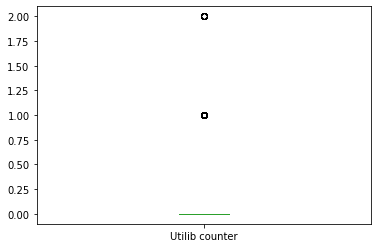

In [ ]:
# Checking for any outliers in the Utilib counter column
# Plot a box plot to visualize outliers in the Utilib counter column
df.boxplot(column =['Utilib counter'], grid = False) 

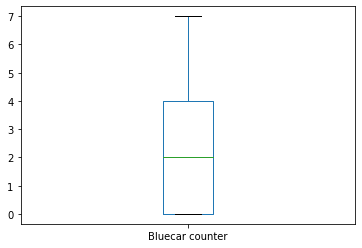

In [ ]:
# Check for any outliers in the Bluecar counter column 
# Plot a box plot to visualize outliers in the Bluecar  counter column
df.boxplot(column =['Bluecar counter'], grid = False) 


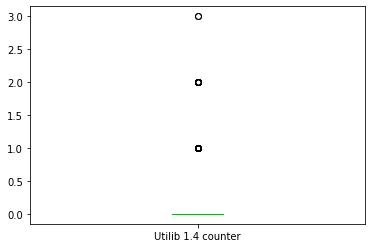

In [ ]:
# Check for any outliers in the Utilib1.4 column
# Plot a box plot to visualize outliers in the  Utilib1.4 counter column
df.boxplot(column =['Utilib 1.4 counter'], grid = False) 

In [ ]:
# Remove any outliers based on the IQR range 
# Calculate  first and third quantiles and then the IQR
# Store results in the data frame 'df_2'

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_2 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the shape of the new dataset
print(df_2.shape)

# Printing the shape of the old dataset
print(df.shape)


(4210, 15)
(5000, 15)


CONSISTENCY

In [ ]:
# Check for any duplicates
df_2.duplicated()

0       False
1       False
4       False
5       False
6       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 4210, dtype: bool

COMPLETENESS

In [ ]:
# Count missing values 
df_2.isnull().sum()

Address               0
Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
City                  0
ID                    0
Kind                  0
Postal code           0
Slots                 0
Status                0
year                  0
month                 0
day                   0
hour                  0
minute                0
dtype: int64

ACCURACY

In [ ]:
# Procedure : None
# Data cleaning action : None
# Explanation : None

UNIFORMITY


In [ ]:
# Rename columns from upper case to lowercase
df_2.columns = df_2.columns.str.lower()
df_2.columns

Index(['address', 'bluecar counter', 'utilib counter', 'utilib 1.4 counter',
       'city', 'id', 'kind', 'postal code', 'slots', 'status', 'year', 'month',
       'day', 'hour', 'minute'],
      dtype='object')

In [ ]:
# Rename columns
df_2.columns = ['address', 'bluecar', 'utilib', 'utilib1.4', 'city', 'id', 'kind', 'postal_code', 'slots', 'status', 'year', 'month', 'day', 'hour', 'minute']
df_2.columns

Index(['address', 'bluecar', 'utilib', 'utilib1.4', 'city', 'id', 'kind',
       'postal_code', 'slots', 'status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [ ]:
# Rename some column names in the data

pd.options.mode.chained_assignment = None  # default='warn'
df_2.rename(columns={'bluecar_counter':'bluecar', 'utilib_counter': 'utilib', 'utilib_1.4_counter':'utilib_1.4'}, inplace=True)
df_2


,address,bluecar,utilib,utilib1.4,city,id,kind,postal_code,slots,status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,2018,4,8,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,2018,4,4,17,27


In [ ]:
# Fix  mess in  column names
# Negative number means a car was picked
# Positive number means a car was returned
# Zero means nothing happened

df_2.columns = df_2.columns.str.lower().str.replace(' ', '_')
df_2.head(5)

,address,bluecar,utilib,utilib1.4,city,id,kind,postal_code,slots,status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,2018,4,8,18,20


In [ ]:
# Create a date_time column to hold; year, month, day, hour, minute
df_2['datetime'] = pd.to_datetime(df_2[['year',	'month', 'day',	'hour',	'minute']])
df_2.head(10)

,address,bluecar,utilib,utilib1.4,city,id,kind,postal_code,slots,status,year,month,day,hour,minute,datetime
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24,2018-04-06 07:24:00
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23,2018-04-08 17:23:00
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,2018,4,6,7,2,2018-04-06 07:02:00
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,2018,4,8,18,20,2018-04-08 18:20:00
8,34 avenue Jean Moulin,1,0,0,Paris,paris-jeanmoulin-34,STATION,75014,4,ok,2018,4,2,22,58,2018-04-02 22:58:00
9,41 boulevard de Rochechouart,6,0,0,Paris,paris-anvers-parking,PARKING,75009,0,ok,2018,4,4,15,2,2018-04-04 15:02:00
10,14 rue Censier,0,0,0,Paris,paris-censier-14,STATION,75005,6,ok,2018,4,1,4,39,2018-04-01 04:39:00
11,12 Rue Francis de PressensÃ©,1,0,0,Puteaux,puteaux-francisdepressense-12,STATION,92800,4,ok,2018,4,6,9,20,2018-04-06 09:20:00
13,34 avenue Jean Moulin,0,0,0,Paris,paris-jeanmoulin-34,STATION,75014,0,ok,2018,4,8,21,54,2018-04-08 21:54:00


In [ ]:
# Drop the year, month, day and minute column 
# Because this information is available in the datetime column
# Retain hour column as it is needed 

df_2.drop(['year', 'month', 'day', 'minute'], axis = 1, inplace = True)
df_2.head()

,address,bluecar,utilib,utilib1.4,city,id,kind,postal_code,slots,status,hour,datetime
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,11,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,7,2018-04-06 07:24:00
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,17,2018-04-08 17:23:00
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,7,2018-04-06 07:02:00
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,18,2018-04-08 18:20:00


In [ ]:
# Add usage columns for Bluecar cars
# Preview dataframe to view added columns
df_2['bluecar_usage'] = df_2['bluecar'].diff()

df_2.head()

,address,bluecar,utilib,utilib1.4,city,id,kind,postal_code,slots,status,hour,datetime,bluecar_usage
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,11,2018-04-08 11:43:00,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,7,2018-04-06 07:24:00,6.0
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,17,2018-04-08 17:23:00,-3.0
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,7,2018-04-06 07:02:00,-3.0
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,18,2018-04-08 18:20:00,0.0


In [ ]:
# Add usage columns for Utilib cars
# Add usage columns for Utilib1.4 cars
df_2['utilib_usage'] = df_2['utilib'].diff()
df_2['utilib_1.4_usage'] = df_2['utilib1.4'].diff()
df_2.head()

,address,bluecar,utilib,utilib1.4,city,id,kind,postal_code,slots,status,hour,datetime,bluecar_usage,utilib_usage,utilib_1.4_usage
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,11,2018-04-08 11:43:00,NaN,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,7,2018-04-06 07:24:00,6.0,0.0,0.0
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,17,2018-04-08 17:23:00,-3.0,0.0,0.0
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,7,2018-04-06 07:02:00,-3.0,0.0,0.0
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,18,2018-04-08 18:20:00,0.0,0.0,0.0


In [ ]:
#  Export data into a csv file as it is now clean
df_2.to_csv('autolib.csv')

In [ ]:
# View the shape of the new dataset 
df_2.shape

(4210, 15)

DATA ANALYSIS

In [ ]:
# Select rows with Paris under the city column 
df_paris = df_2[df_2['city'] == 'Paris']
df_paris.head(10)

,address,bluecar,utilib,utilib1.4,city,id,kind,postal_code,slots,status,hour,datetime,bluecar_usage,utilib_usage,utilib_1.4_usage
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,11,2018-04-08 11:43:00,NaN,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,7,2018-04-06 07:24:00,6.0,0.0,0.0
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,17,2018-04-08 17:23:00,-3.0,0.0,0.0
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,7,2018-04-06 07:02:00,-3.0,0.0,0.0
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,18,2018-04-08 18:20:00,0.0,0.0,0.0
8,34 avenue Jean Moulin,1,0,0,Paris,paris-jeanmoulin-34,STATION,75014,4,ok,22,2018-04-02 22:58:00,1.0,0.0,0.0
9,41 boulevard de Rochechouart,6,0,0,Paris,paris-anvers-parking,PARKING,75009,0,ok,15,2018-04-04 15:02:00,5.0,0.0,0.0
10,14 rue Censier,0,0,0,Paris,paris-censier-14,STATION,75005,6,ok,4,2018-04-01 04:39:00,-6.0,0.0,0.0
13,34 avenue Jean Moulin,0,0,0,Paris,paris-jeanmoulin-34,STATION,75014,0,ok,21,2018-04-08 21:54:00,-1.0,0.0,0.0
14,8 Boulevard Richard Lenoir,0,0,0,Paris,paris-richardlenoir-8,STATION,75011,4,ok,8,2018-04-06 08:00:00,0.0,0.0,0.0


In [ ]:
# Find shape of the dataset which has Paris with its city column
df_paris.shape

(2412, 15)

Which is the most popular hour for returning a bluecar?

In [ ]:
# Find the most popular hour for returning a bluecar
df_paris[df_paris['bluecar_usage'] > 0].groupby('hour')['hour'].count().sort_values(ascending= False).head(1)

hour
8    45
Name: hour, dtype: int64

Which is the most popular hour for picking up a bluecar a shared electric car (bluecar) in the city of Paris over the month of April 2018?

In [ ]:
# Find the most popular hour hour of the day for picking up a shared electric car (bluecar)in the city of Paris over the month of April 2018?
df_paris[df_paris['bluecar_usage'] < 0].groupby('hour')['hour'].count().sort_values(ascending= False).head(1)


hour
21    63
Name: hour, dtype: int64

Which station is the most popular?


In [ ]:
# Find the most popular station at the most popular picking hour
df_paris[(df_paris['status']=='ok') & (df_paris['kind']=='STATION') & (df_paris['hour'] == 21)].groupby('id')['id'].count().sort_values(ascending= False).head(1)

id
paris-tronchet-19    4
Name: id, dtype: int64

In [ ]:
# Find the most popular station overall
df_paris[(df_paris['status']=='ok') & (df_paris['kind']=='STATION')].groupby('id')['id'].count().sort_values(ascending= False).head(1)

id
paris-voltaire-182    11
Name: id, dtype: int64

Which postal code is the most popular for picking up Bluecars?

In [ ]:
# Find the most popular postal code for picking up bluecars
df_paris[(df_paris['bluecar_usage'] < 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

postal_code
75015    99
Name: postal_code, dtype: int64

In [ ]:
# Find the most popular postal code overall
df_paris[(df_paris['status']=='ok') & (df_paris['kind']=='STATION')].groupby('postal_code')['postal_code'].count().sort_values(ascending= False).head(1)

postal_code
75015    185
Name: postal_code, dtype: int64

In [ ]:
# Find if the most popular station at the most popular picking hour belongs to the most popular postal code for picking up blue cars
df_paris[(df_paris['status']=='ok') & (df_paris['kind']=='STATION') & (df_paris['hour']==21)].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

postal_code
75008    11
Name: postal_code, dtype: int64

The conclusion is that the most popular station has the most popular postal code for picking up bluecars which is 75015

The conclusion is that the most popular station at the most popular picking hour does not belong to the most popular postal code for picking up blue cars

UTILIB ANALYSIS

In [ ]:
# Find the most popular hour of the day for picking up a shared electric car(utilib)in the city of Paris over the month of April 2018
df_paris[df_paris['utilib_usage'] < 0].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

Series([], Name: hour, dtype: int64)

In [ ]:

# Find the most popular hour for returning a utilib car in Paris
df_paris[df_paris['utilib_usage'] > 0].groupby('hour')['hour'].count().sort_values(ascending= False).head(1)

Series([], Name: hour, dtype: int64)

Which postal code is the most popular for picking up Utilib and Utilib 1.4 cars?

In [ ]:
# Find the most popular postal code for picking up utilib cars
df_paris[(df_paris['utilib_usage'] < 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

Series([], Name: postal_code, dtype: int64)

In [ ]:
# Find the postal code is the most popular for picking up utilib cars at the most popular picking hour
df_paris[(df_paris['utilib_usage'] < 0) & (['hour'])].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

Series([], Name: postal_code, dtype: int64)

In [ ]:
# Find the most popular hour of the day for picking up a shared electric car(utilib1.4)in the city of Paris over the month of April 2018
df_paris[df_paris['utilib_1.4_usage'] < 0].groupby('hour')['hour'].count().sort_values(ascending = False).head()

Series([], Name: hour, dtype: int64)

In [ ]:
# Find the most popular hour for returning a utilib1.4 car

df_paris[df_paris['utilib_1.4_usage'] > 0].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

Series([], Name: hour, dtype: int64)

Which postal code is the most popular for picking up utilib1.4 cars?

In [ ]:
# Find the most popular postal code for picking up utilib1.4 cars
df_paris[(df_paris['utilib_1.4_usage'] < 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

Series([], Name: postal_code, dtype: int64)

In [ ]:
# Find the postal code is the most popular for picking up utilib1.4 cars at the most popular picking hour
df_paris[(df_paris['utilib_1.4_usage'] < 0) & (['hour'])].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

Series([], Name: postal_code, dtype: int64)

Which is the most popular address for picking up blue cars?

In [ ]:
# Find the most popular address for picking up blue cars
df_paris[(df_paris['bluecar_usage'] < 0)].groupby('address')['address'].count().sort_values(ascending = False).head()

address
31 boulevard de Grenelle    9
182 Boulevard Voltaire      7
18 rue Madame               7
20 Rue Villiot              7
169 avenue de Flandre       6
Name: address, dtype: int64

In [ ]:
# Find if the most popular station belongs to the most popular address for picking up blue cars
df_paris[(df_paris['status']=='ok') & (df_paris['kind']=='STATION')].groupby('address')['address'].count().sort_values(ascending = False).head(1)

address
182 Boulevard Voltaire    11
Name: address, dtype: int64

The conclusion is that  the most popular station does not belong to the most popular address for picking up blue cars